In [97]:
print("retest oke")

retest oke


# ***Provide metadata***

In [98]:
import os 
FOLDER_PATH = 'D:/cd_data_C/Desktop/Notebooks/Notebooks/Dataset/MY_data/train'

In [99]:
import pandas as pd 
import re

def get_metadata(root_folder):  
    paths = [] 
    folders = [] 
    for dirpath, dirnames, filenames in sorted(os.walk(root_folder)): #!!! must sorted 
        for file in filenames:  
            fullpath = os.path.join(dirpath, file)
            paths.append(fullpath) 
            folder = re.split(r'[\\/]', fullpath)[-2].lower()
            folders.append(folder)
    
    # print(paths, folders) 
    meta = pd.DataFrame({'path': paths, 'folder': folders})
    return meta 


In [100]:
meta = get_metadata(FOLDER_PATH) 
name_labels = [x.lower() for x in set(sorted(os.listdir('D:\\cd_data_C\\Desktop\\Notebooks\\Notebooks\\Dataset\\MY_data\\train')))] #!!!
meta

,path,folder
0,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
1,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
2,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
3,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
4,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
...,...,...
2296,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,watermelon
2297,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,watermelon
2298,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,watermelon
2299,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,watermelon


In [101]:
print(meta.iloc[0]) 

path      D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...

folder                                                apple

Name: 0, dtype: object


In [102]:
print(name_labels) 

['strawberries', 'pinenapple', 'orange', 'cherry', 'watermelon', 'apple', 'mango', 'avocado', 'kiwi', 'banana']


# ***Provide training dataset***

In [103]:
import cv2 
import inspect  
import numpy as np 


def current_function_name():  
    # Get the name of the current function  
    caller_frame = inspect.currentframe().f_back.f_back  
    return caller_frame.f_code.co_name  


def post(*e): 
    for u in e: 
        print(u, end=' ', flush=True) 
    print(flush=True) 

    
def log_except(e): 
    post(f"%%%Except was ocurred at <{current_function_name()}>")
    post(e)

    
def post_obj(obj, name="", atts=["len", "shape", "type", "min-max", "get"]): 
    post(f"%%%Object {name} was posted at <{current_function_name()}>")
    s = "{\n" 
    try: 
        if("len" in atts): s += str(len(obj)) + ", "
    except Exception as e: pass 
    
    try: 
        if("shape" in atts): s += str(obj.shape) + ", "
    except Exception as e: pass 
    
    try: 
        if("type" in atts): s += type(obj) + ", "
    except Exception as e: pass 
        
    try: 
        if("min-max" in atts): s += "[" + str(obj.min()) + ", " + str(obj.max()) + "]"
    except Exception as e: pass
    post(s) 
    
    try: 
        if("get" in atts): post("get random a element is:", obj[0]) 
    except Exception as e: pass
    post("}")

        
def load_image(path): 
    # Load the image  
    try: 
        image = cv2.imread(path)
        # Resize the image to 256x256  
        resized_image = cv2.resize(image, (256, 256))  
        # Convert to grayscale  
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY) 
        # Normalize the pixel values to the range [0, 1]  
    #     normalized_image = gray_image / 255.0
        return gray_image
    except Exception as e:  
        log_except(e) 
        return None 
    
    
def extract_feature(path): 
    try: 
        image = load_image(path) 
        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
        histogram /= (image.shape[0] * image.shape[1])
        histogram = histogram.reshape(-1) 
        return histogram 
    except Exception as e: 
        log_except(e) 
        return None 
    
    
def get_xy_data(metadata): 
    X, y = [], [] 
    for i in range(len(metadata)): 
        path, folder = metadata.iloc[i].loc['path'], metadata.iloc[i].loc['folder'] 
        _x = extract_feature(path)
        _y = name_labels.index(folder)
        if(_x is None or _y is None): 
            continue 
        X.append(_x) 
        y.append(_y) 
    X, y = np.array(X), np.array(y) 
    return X, y


In [104]:
X, y = get_xy_data(meta)
post_obj(X)
post_obj(y)

%%%Except was ocurred at <load_image> 

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

 

%%%Except was ocurred at <extract_feature> 

'NoneType' object has no attribute 'shape' 

%%%Object  was posted at <<module>> 

{

2300, (2300, 256), [0.0, 0.8865204] 

get random a element is: [5.6762695e-03 1.5975952e-01 1.8530273e-01 3.2546997e-02 2.6077271e-02

 2.4185181e-02 1.9104004e-02 1.4312744e-02 1.3885498e-02 1.6403198e-02

 2.0538330e-02 1.6311646e-02 2.4765015e-02 1.8554688e-02 1.5213013e-02

 9.6282959e-03 1.2649536e-02 9.1857910e-03 1.1123657e-02 7.5073242e-03

 5.6457520e-03 5.3710938e-03 3.5552979e-03 3.7078857e-03 3.2196045e-03

 2.8991699e-03 2.2430420e-03 2.5939941e-03 2.6702881e-03 2.4871826e-03

 2.4871826e-03 2.1667480e-03 2.2583008e-03 1.9989014e-03 1.9378662e-03

 1.9836426e-03 2.5329590e-03 2.1209717e-03 2.1057129e-03 2.1514893e-03

 2.1820068e-03 1.6937256

# **sub1**: grid K for KNN 

In [105]:
def format_path(path): 
  return path.replace("\\", "/")

_meta1 = format_path('D:\\cd_data_C\\Desktop\\Notebooks\\Notebooks\\Dataset\\MY_data\\train') 
_meta1 = get_metadata(_meta1) 
_meta2 = format_path('D:\\cd_data_C\\Desktop\\Notebooks\\Notebooks\\Dataset\\MY_data\\test') 
_meta2 = get_metadata(_meta2)
meta = result = pd.concat([_meta1, _meta2], ignore_index=True)
meta


,path,folder
0,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
1,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
2,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
3,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
4,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,apple
...,...,...
3321,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,watermelon
3322,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,watermelon
3323,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,watermelon
3324,D:/cd_data_C/Desktop/Notebooks/Notebooks/Datas...,watermelon


In [106]:
from sklearn.model_selection import train_test_split


x_load, y_load = get_xy_data(meta) 
# Split the dataset into train+val and test sets first
x_temp, x_test, y_temp, y_test = train_test_split(x_load, y_load, test_size=0.2, random_state=42)
# Now split the remaining dataset into train and val sets
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

%%%Except was ocurred at <load_image> 

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

 

%%%Except was ocurred at <extract_feature> 

'NoneType' object has no attribute 'shape' 


KeyboardInterrupt: 

In [ ]:
post_obj(x_train)
post_obj(y_train) 

%%%Object  was posted at <<module>> 

{

1995, (1995, 256), [0.0, 0.88783264] 

get random a element is: [0.00000000e+00 0.00000000e+00 2.13623047e-04 5.03540039e-04

 8.54492188e-04 1.52587891e-03 1.95312500e-03 3.08227539e-03

 4.63867188e-03 6.62231445e-03 5.23376465e-03 4.66918945e-03

 4.60815430e-03 4.21142578e-03 4.24194336e-03 5.05065918e-03

 4.83703613e-03 5.02014160e-03 5.40161133e-03 6.31713867e-03

 6.22558594e-03 5.78308105e-03 6.59179688e-03 6.48498535e-03

 7.33947754e-03 7.67517090e-03 7.61413574e-03 8.62121582e-03

 9.24682617e-03 8.92639160e-03 9.53674316e-03 9.70458984e-03

 9.93347168e-03 1.05743408e-02 1.02539062e-02 1.06201172e-02

 1.17187500e-02 1.25732422e-02 1.16424561e-02 1.18255615e-02

 1.12609863e-02 1.17797852e-02 1.13220215e-02 1.10015869e-02

 1.11999512e-02 1.17340088e-02 1.09100342e-02 1.21154785e-02

 1.17950439e-02 1.19628906e-02 1.14593506e-02 1.19934082e-02

 1.12762451e-02 1.12762451e-02 1.12762451e-02 1.14135742e-02

 1.05590820e-02 1.07116699e

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


def evaluate_score(x_train, y_train, x_val, y_val, x_test, y_test): 
    df = pd.DataFrame({'k': [], 'train-acc': [], 'val-acc': [], 'test-acc': []}) 
    for k in range(1, 6): 
        knn_hypo = KNeighborsClassifier(n_neighbors=k) 
        # post_obj(x_train)
        # post_obj(y_train) 
        knn_hypo.fit(X=x_train, y=y_train)
        
        train_acc = knn_hypo.score(x_train, y_train)
        val_acc = knn_hypo.score(x_val, y_val)
        test_acc = knn_hypo.score(x_test, y_test) 
        df.loc[len(df)] = [k, train_acc, val_acc, test_acc]
    return df


In [ ]:
score_data = evaluate_score(x_train, y_train, x_val, y_val, x_test, y_test) 
score_data

,k,train-acc,val-acc,test-acc
0,1.0,1.000000,0.227068,0.215038
1,2.0,0.591980,0.209023,0.213534
2,3.0,0.504762,0.209023,0.203008
3,4.0,0.465664,0.193985,0.193985
4,5.0,0.432080,0.175940,0.189474


In [ ]:
score_data['train-acc']

0    1.000000
1    0.591980
2    0.504762
3    0.465664
4    0.432080
Name: train-acc, dtype: float64

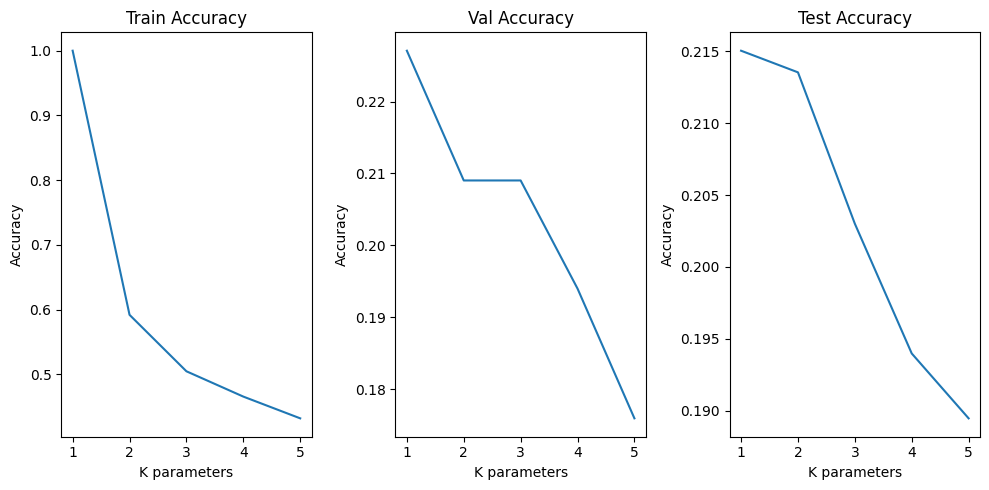

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1) 
plt.plot(range(1, 6), score_data['train-acc'])
plt.title('Train Accuracy')
plt.xlabel('K parameters')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2) 
plt.plot(range(1, 6), score_data['val-acc'])
plt.title('Val Accuracy')
plt.xlabel('K parameters')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 3) 
plt.plot(range(1, 6), score_data['test-acc'])
plt.title('Test Accuracy')
plt.xlabel('K parameters')
plt.ylabel('Accuracy')

# Show the plot
plt.tight_layout()
plt.show()

# **sub2**: show report(accuracy and precision for each class)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
svc_hypo = SVC(C=1).fit(x_train, y_train) 
print(classification_report(y_train, svc_hypo.predict(x_train)))


              precision    recall  f1-score   support



           0       0.22      0.44      0.29       195

           1       0.33      0.17      0.22       199

           2       0.61      0.21      0.31       195

           3       0.33      0.46      0.39       212

           4       0.22      0.22      0.22       205

           5       0.25      0.32      0.28       182

           6       0.20      0.55      0.29       208

           7       0.43      0.05      0.09       203

           8       0.46      0.13      0.20       201

           9       0.62      0.12      0.21       195



    accuracy                           0.27      1995

   macro avg       0.37      0.27      0.25      1995

weighted avg       0.37      0.27      0.25      1995




In [ ]:
print("Val report(accuracy and precision) is:")
print(classification_report(y_val, svc_hypo.predict(x_val)))
print("Test report(accuracy and precision) is:")
print(classification_report(y_test, svc_hypo.predict(x_test)))

Val report(accuracy and precision) is:

              precision    recall  f1-score   support



           0       0.22      0.42      0.29        72

           1       0.24      0.12      0.16        74

           2       0.44      0.17      0.24        66

           3       0.23      0.38      0.29        58

           4       0.23      0.20      0.21        70

           5       0.21      0.23      0.22        65

           6       0.17      0.54      0.25        59

           7       0.14      0.02      0.03        62

           8       0.39      0.10      0.16        71

           9       0.37      0.10      0.16        68



    accuracy                           0.22       665

   macro avg       0.26      0.23      0.20       665

weighted avg       0.27      0.22      0.20       665



Test report(accuracy and precision) is:

              precision    recall  f1-score   support



           0       0.24      0.39      0.30        66

           1       0.27      0.

# **sub3**: 'ovo' vs. 'ovr'

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def show_svector_accuracy_confusion(svc_ovo_hypo, x_train, y_train, x_val, y_val, x_test, y_test): 
    print("SVectors is:")
    print(f"Shape is: {svc_ovo_hypo.support_vectors_.shape}") 
    print(f"No. is: {svc_ovo_hypo.support_vectors_.shape[0]}")
    print(f"Rate points is: {svc_ovo_hypo.support_vectors_.shape[0]} / {len(x_train)}")
    
    print(f"Train accuracy is: {svc_ovo_hypo.score(x_train, y_train)}") 
    print(f"Val accuracy is: {svc_ovo_hypo.score(x_val, y_val)}") 
    print(f"Test accuracy is: {svc_ovo_hypo.score(x_test, y_test)}") 
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test, svc_ovo_hypo.predict(x_test))
    plt.figure(figsize=(25, 25))
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

SVectors is:

Shape is: (1985, 256)

No. is: 1985

Rate points is: 1985 / 1995

Train accuracy is: 0.268671679197995

Val accuracy is: 0.22255639097744362

Test accuracy is: 0.20300751879699247


<Figure size 2500x2500 with 0 Axes>

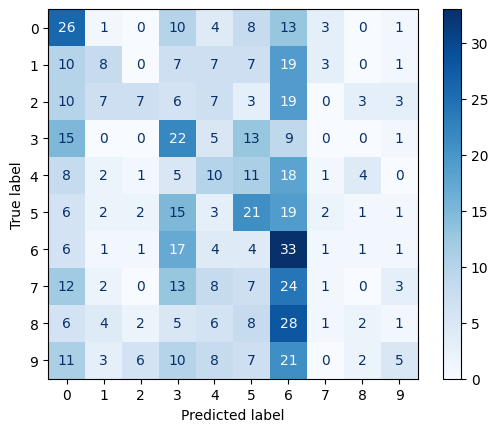

In [ ]:
svc_ovo_hypo = SVC(C=1, decision_function_shape='ovo')
svc_ovo_hypo.fit(x_train, y_train)
show_svector_accuracy_confusion(svc_ovo_hypo, x_train, y_train, x_val, y_val, x_test, y_test)

SVectors is:

Shape is: (1985, 256)

No. is: 1985

Rate points is: 1985 / 1995

Train accuracy is: 0.268671679197995

Val accuracy is: 0.22255639097744362

Test accuracy is: 0.20300751879699247


<Figure size 2500x2500 with 0 Axes>

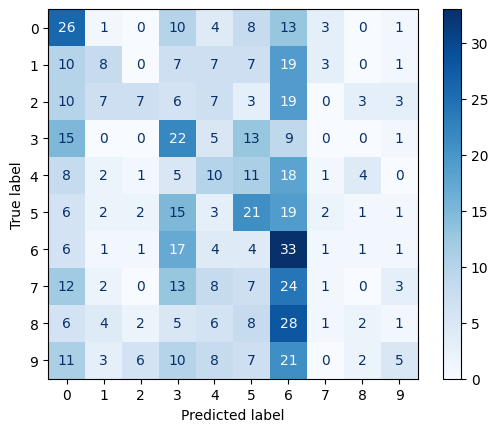

In [ ]:
svc_ovr_hypo = SVC(C=1, decision_function_shape="ovr")
svc_ovr_hypo.fit(x_train, y_train)
show_svector_accuracy_confusion(svc_ovr_hypo, x_train, y_train, x_val, y_val, x_test, y_test)

# **sub4**: grid C for SVC 

In [ ]:
from tqdm import tqdm


def grid_c_svc(x_train, y_train, x_val, y_val, x_test, y_test): 
    df = pd.DataFrame({'c': [], 'train-acc': [], 'val-acc': [], 'test-acc': []}) 
    for k in tqdm(range(-10, 11)): 
        svc = SVC(C=10**k).fit(X=x_train, y=y_train)
        
        train_acc = svc.score(x_train, y_train)
        val_acc = svc.score(x_val, y_val)
        test_acc = svc.score(x_test, y_test) 
        df.loc[len(df)] = [k, train_acc, val_acc, test_acc]
    return df


In [ ]:
df = grid_c_svc(x_train, y_train, x_val, y_val, x_test, y_test)

100%|██████████| 21/21 [00:57<00:00,  2.73s/it]


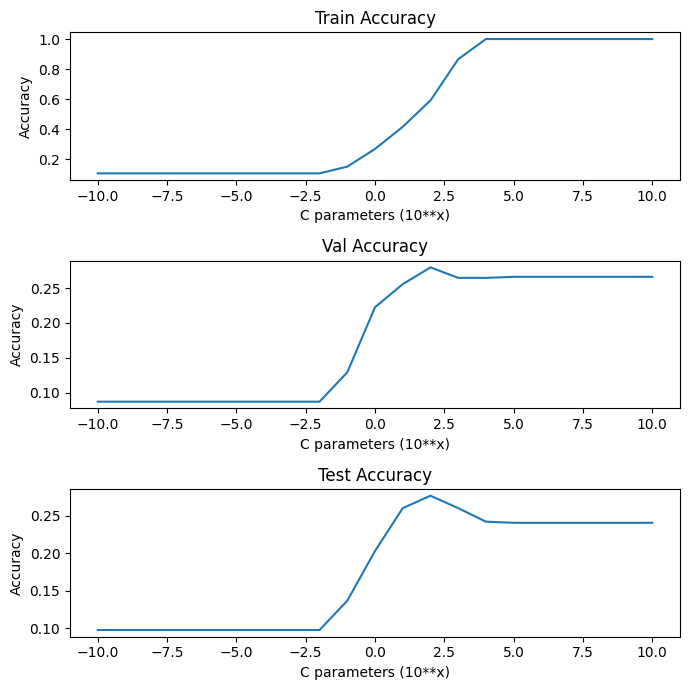

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

score_data = df 
plt.subplot(3, 1, 1) 
plt.plot(score_data['c'], score_data['train-acc'])
plt.title('Train Accuracy')
plt.xlabel('C parameters (10**x)')
plt.ylabel('Accuracy')

plt.subplot(3, 1, 2) 
plt.plot(score_data['c'], score_data['val-acc'])
plt.title('Val Accuracy')
plt.xlabel('C parameters (10**x)')
plt.ylabel('Accuracy')

plt.subplot(3, 1, 3) 
plt.plot(score_data['c'], score_data['test-acc'])
plt.title('Test Accuracy')
plt.xlabel('C parameters (10**x)')
plt.ylabel('Accuracy')

# Show the plot
plt.tight_layout()
plt.show()

# **deploy**

In [ ]:
# - So, from the above analysis, I decide to use hypothesis SVC(C=10**2) from sklearn-framework, because it show the best accuracy. 
# - First, I restart-train and save the hypothesis. 

In [ ]:
hypo = SVC(C=10**2).fit(x_load, y_load) 

In [ ]:
print(hypo.score(x_load, y_load), hypo.score(x_test, y_test)) 

0.561203007518797 0.5729323308270676


In [ ]:
import joblib 

# Save the model to a file
joblib.dump(hypo, 'svc_c_100_hypo.pkl')

['svc_c_100_hypo.pkl']

In [94]:
name_labels

['strawberries',
 'pinenapple',
 'orange',
 'cherry',
 'watermelon',
 'apple',
 'mango',
 'avocado',
 'kiwi',
 'banana']

In [96]:
# Write the list to a file, one number per line
with open("name_labels.txt", "w") as file:
    for item in name_labels:
        file.write(f"{item}\n")

# Predict System 

In [92]:
trained_model = joblib.load('svc_c_100_hypo.pkl')

In [107]:
# Read the list from the file
with open("name_labels.txt", "r") as file:
    loaded_list = [line.strip() for line in file.readlines()]

loaded_list 

['strawberries',
 'pinenapple',
 'orange',
 'cherry',
 'watermelon',
 'apple',
 'mango',
 'avocado',
 'kiwi',
 'banana']

In [111]:
class PredictSystem: 
    def __init__(self, link_model, link_classes) -> None:
        self._trained_model_ = joblib.load(link_model)
        with open(link_classes, "r") as file:
            self._classes_ = [line.strip() for line in file.readlines()]
    
    def _load_image(self, path): 
    # Load the image  
        try: 
            image = cv2.imread(path)
            # Resize the image to 256x256  
            resized_image = cv2.resize(image, (256, 256))  
            # Convert to grayscale  
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY) 
            # Normalize the pixel values to the range [0, 1]  
        #     normalized_image = gray_image / 255.0
            return gray_image
        except Exception as e:  
            print(e) 
            return None 
    
    
    def _extract_feature(self, path): 
        try: 
            image = self._load_image(path) 
            histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
            histogram /= (image.shape[0] * image.shape[1])
            histogram = histogram.reshape(-1) 
            return histogram 
        except Exception as e: 
            print(e) 
            return None 
        
    
    def predict(self, image_path): 
        image = self._load_image(image_path) 
        new_x = self._extract_feature(image_path)
        new_y = self._trained_model_.predict(np.array([new_x]))[0]
        class_predict = self._classes_[new_y] 
        
        plt.imshow(image)
        print(f"class predict is: {class_predict}")

In [112]:
system = PredictSystem(link_model='svc_c_100_hypo.pkl', link_classes='name_labels.txt')

class predict is: orange


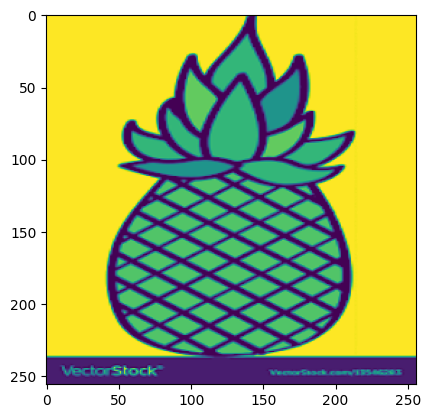

In [114]:
system.predict("D:\\cd_data_C\\Desktop\\Notebooks\\Notebooks\\Dataset\\MY_data\\predict\\33.jpeg")

class predict is: kiwi


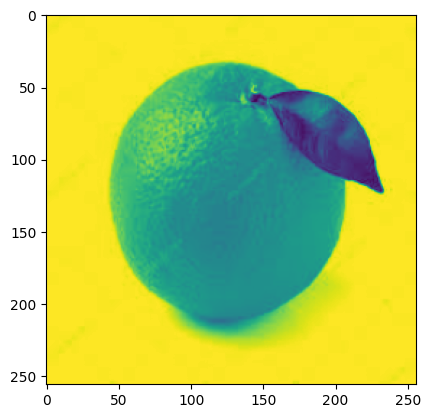

In [117]:
system.predict("D:\\cd_data_C\\Desktop\\Notebooks\\Notebooks\\Dataset\\MY_data\\predict\\img_171.jpeg")